<script async src="https://www.googletagmanager.com/gtag/js?id=UA-59152712-8"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-59152712-8');
</script>

# Start-to-Finish Example: Head-On Black Hole Collision

## Author: Zach Etienne
### Formatting improvements courtesy Brandon Clark

## This module implements a basic numerical relativity code to merge two black holes in *spherical-like coordinates*, as well as the gravitational wave analysis provided by the $\psi_4$ NRPy+ tutorial notebooks ([$\psi_4$](Tutorial-Psi4.ipynb) & [$\psi_4$ tetrad](Tutorial-Psi4_tetrads.ipynb)).

### Here we place the black holes initially on the $z$-axis, so the entire simulation is axisymmetric about the $\phi$-axis. Minimal sampling in the $\phi$ direction greatly speeds up the simulation.

**Notebook Status:** <font color = green><b> Validated </b></font>

**Validation Notes:** This module has been validated to exhibit convergence to zero of the Hamiltonian constraint violation at the expected order to the exact solution *after a short numerical evolution of the initial data* (see [plots at bottom](#convergence)), and all quantities have been validated against the [original SENR code](https://bitbucket.org/zach_etienne/nrpy). Finally, excellent agreement is seen in the gravitational wave signal from the ringing remnant black hole for multiple decades in amplitude when compared to black hole perturbation theory predictions.

### NRPy+ Source Code for this module: 
* [BSSN/BrillLindquist.py](../edit/BSSN/BrillLindquist.py); [\[**tutorial**\]](Tutorial-ADM_Initial_Data-Brill-Lindquist.ipynb): Brill-Lindquist initial data; sets all ADM variables in Cartesian basis: 
* [BSSN/ADM_Exact_Spherical_or_Cartesian_to_BSSNCurvilinear.py](../edit/BSSN/ADM_Exact_Spherical_or_Cartesian_to_BSSNCurvilinear.py); [\[**tutorial**\]](Tutorial-ADM_Initial_Data-Converting_Exact_ADM_Spherical_or_Cartesian_to_BSSNCurvilinear.ipynb): Spherical/Cartesian ADM$\to$Curvilinear BSSN converter function, for which exact expressions are given for ADM quantities.
* [BSSN/BSSN_ID_function_string.py](../edit/BSSN/BSSN_ID_function_string.py): Sets up the C code string enabling initial data be set up in a point-by-point fashion
* [BSSN/BSSN_constraints.py](../edit/BSSN/BSSN_constraints.py); [\[**tutorial**\]](Tutorial-BSSN_constraints.ipynb): Hamiltonian constraint in BSSN curvilinear basis/coordinates
* [BSSN/BSSN_RHSs.py](../edit/BSSN/BSSN_RHSs.py); [\[**tutorial**\]](Tutorial-BSSN_time_evolution-BSSN_RHSs.ipynb): Generates the right-hand sides for the BSSN evolution equations in singular, curvilinear coordinates
* [BSSN/BSSN_gauge_RHSs.py](../edit/BSSN/BSSN_gauge_RHSs.py); [\[**tutorial**\]](Tutorial-BSSN_time_evolution-BSSN_gauge_RHSs.ipynb): Generates the right-hand sides for the BSSN gauge evolution equations in singular, curvilinear coordinates
* [BSSN/Psi4.py](../edit/BSSN/Psi4.py); [\[**tutorial**\]](Tutorial-Psi4.ipynb): Generates expressions for $\psi_4$, the outgoing Weyl scalar
    + [BSSN/Psi4_tetrads.py](../edit/BSSN/Psi4_tetrads.py); [\[**tutorial**\]](Tutorial-Psi4_tetrads.ipynb): Generates quasi-Kinnersley tetrad needed for $\psi_4$-based gravitational wave extraction

## Introduction:
Here we use NRPy+ to generate the C source code necessary to set up initial data for two black holes (Brill-Lindquist, [Brill & Lindquist, Phys. Rev. 131, 471, 1963](https://journals.aps.org/pr/abstract/10.1103/PhysRev.131.471); see also Eq. 1 of [Brandt & Brügmann, arXiv:gr-qc/9711015v1](https://arxiv.org/pdf/gr-qc/9711015v1.pdf)). Then we use it to generate the RHS expressions for [Method of Lines](https://reference.wolfram.com/language/tutorial/NDSolveMethodOfLines.html) time integration based on the [explicit Runge-Kutta fourth-order scheme](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) (RK4).

The entire algorithm is outlined as follows, with links to the relevant NRPy+ tutorial notebooks listed at each step:

1. Allocate memory for gridfunctions, including temporary storage for the Method of Lines time integration
    * [**NRPy+ tutorial on Method of Lines algorithm**](Tutorial-Method_of_Lines-C_Code_Generation.ipynb).
1. Set gridfunction values to initial data 
    * [**NRPy+ tutorial on Brill-Lindquist initial data**](Tutorial-ADM_Initial_Data-Brill-Lindquist.ipynb)
    * [**NRPy+ tutorial on validating Brill-Lindquist initial data**](Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data.ipynb).
1. Next, integrate the initial data forward in time using the Method of Lines coupled to a Runge-Kutta explicit timestepping algorithm:
    1. At the start of each iteration in time, output the Hamiltonian constraint violation 
        * [**NRPy+ tutorial on BSSN constraints**](Tutorial-BSSN_constraints.ipynb).
    1. At each RK time substep, do the following:
        1. Evaluate BSSN RHS expressions 
            * [**NRPy+ tutorial on BSSN right-hand sides**](Tutorial-BSSN_time_evolution-BSSN_RHSs.ipynb)
            * [**NRPy+ tutorial on BSSN gauge condition right-hand sides**](Tutorial-BSSN_time_evolution-BSSN_gauge_RHSs.ipynb) 
        1. Apply singular, curvilinear coordinate boundary conditions [*a la* the SENR/NRPy+ paper](https://arxiv.org/abs/1712.07658)
            * [**NRPy+ tutorial on setting up singular, curvilinear boundary conditions**](Tutorial-Start_to_Finish-Curvilinear_BCs.ipynb)
        1. Enforce constraint on conformal 3-metric: $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ 
            * [**NRPy+ tutorial on enforcing $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ constraint**](Tutorial-BSSN-Enforcing_Determinant_gammabar_equals_gammahat_Constraint.ipynb)
1. Repeat above steps at two numerical resolutions to confirm convergence to zero.

<a id='toc'></a>

# Table of Contents
$$\label{toc}$$

This notebook is organized as follows

1. [Step 1](#initializenrpy): Set core NRPy+ parameters for numerical grids and reference metric
1. [Step 2](#adm_id): Import Brill-Lindquist ADM initial data C function from the [`BSSN.BrillLindquist`](../edit/BSSN/BrillLindquist.py) NRPy+ module
1. [Step 3](#bssn): Output C code for BSSN spacetime solve
    1. [Step 3.a](#bssnrhs): Output C code for BSSN RHS expressions
    1. [Step 3.b](#hamconstraint): Output C code for Hamiltonian constraint
    1. [Step 3.c](#enforce3metric): Enforce conformal 3-metric $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ constraint
    1. [Step 3.d](#spinweight): Computing $_{-2}Y_{\ell m} (\theta, \phi)$ for all $(\ell,m)$ for $\ell=0$ up to 2
    1. [Step 3.e](#psi4): $\psi_4$
    1. [Step 3.f](#cparams_rfm_and_domainsize): Output C codes needed for declaring and setting Cparameters; also set `free_parameters.h`
1. [Step 4](#bc_functs): Set up boundary condition functions for chosen singular, curvilinear coordinate system
1. [Step 5](#mainc): `BrillLindquist_Playground.c`: The Main C Code
1. [Step 6](#visualize): Data Visualization Animations
    1. [Step 6.a](#installdownload): Install `scipy` and download `ffmpeg` if they are not yet installed/downloaded
    1. [Step 6.b](#genimages): Generate images for visualization animation
    1. [Step 6.c](#genvideo): Generate visualization animation
1. [Step 7](#convergence): Visualize the numerical error, and confirm that it converges to zero with increasing numerical resolution (sampling)
1. [Step 8](#latex_pdf_output): Output this notebook to $\LaTeX$-formatted PDF file

<a id='initializenrpy'></a>

# Step 1: Set core NRPy+ parameters for numerical grids and reference metric \[Back to [top](#toc)\]
$$\label{initializenrpy}$$

In [1]:
# Step P0: Set the option for evolving the initial data forward in time
#          Options include "low resolution" and "high resolution"
EvolOption = "low resolution"

# Step P1: Import needed NRPy+ core modules:
from outputC import *            # NRPy+: Core C code output module
import finite_difference as fin  # NRPy+: Finite difference C code generation module
import NRPy_param_funcs as par   # NRPy+: Parameter interface
import grid as gri               # NRPy+: Functions having to do with numerical grids
import indexedexp as ixp         # NRPy+: Symbolic indexed expression (e.g., tensors, vectors, etc.) support
import reference_metric as rfm   # NRPy+: Reference metric support
import cmdline_helper as cmd     # NRPy+: Multi-platform Python command-line interface
import shutil, os, sys, time     # Standard Python modules for multiplatform OS-level functions, benchmarking

# Step P2: Create C code output directory:
Ccodesdir = os.path.join("BSSN_Two_BHs_Collide_Ccodes/")
# First remove C code output directory if it exists
# Courtesy https://stackoverflow.com/questions/303200/how-do-i-remove-delete-a-folder-that-is-not-empty
shutil.rmtree(Ccodesdir, ignore_errors=True)
# Then create a fresh directory
cmd.mkdir(Ccodesdir)

# Step P3: Create executable output directory:
outdir = os.path.join(Ccodesdir,"output/")
cmd.mkdir(outdir)

# Step 1: Set the spatial dimension parameter 
#         to three (BSSN is a 3+1 decomposition
#         of Einstein's equations), and then read
#         the parameter as DIM.
DIM = 3
par.set_parval_from_str("grid::DIM",DIM)

# Step 2: Set some core parameters, including CoordSystem MoL timestepping algorithm,
#                                 FD order, floating point precision, and CFL factor:
# Choices are: Spherical, SinhSpherical, SinhSphericalv2, Cylindrical, SinhCylindrical, 
#              SymTP, SinhSymTP
CoordSystem     = "SinhSpherical"

if EvolOption == "low resolution":
    # domain_size sets the default value for:
    #   * Spherical's params.RMAX
    #   * SinhSpherical*'s params.AMAX
    #   * Cartesians*'s -params.{x,y,z}min & .{x,y,z}max
    #   * Cylindrical's -params.ZMIN & .{Z,RHO}MAX
    #   * SinhCylindrical's params.AMPL{RHO,Z}
    #   * *SymTP's params.AMAX
    domain_size = 150 # Length scale of computational domain
    final_time  = 200 # Final time
    FD_order    = 8   # Finite difference order: even numbers only, starting with 2. 12 is generally unstable
elif EvolOption == "high resolution":
    # See above for description of the domain_size parameter
    domain_size = 300 # Length scale of computational domain
    final_time  = 275 # Final time
    FD_order    = 10  # Finite difference order: even numbers only, starting with 2. 12 is generally unstable
else:
    print("Error: output is not tuned for Nr = "+str(Nr)+" . Plotting disabled.")
    exit(1)

# sinh_width sets the default value for:
#   * SinhSpherical's params.SINHW
#   * SinhCylindrical's params.SINHW{RHO,Z}
#   * SinhSymTP's params.SINHWAA
sinh_width      = 0.2 # If Sinh* coordinates chosen

# sinhv2_const_dr sets the default value for:
#   * SinhSphericalv2's params.const_dr
#   * SinhCylindricalv2's params.const_d{rho,z}
sinhv2_const_dr = 0.05 # If Sinh*v2 coordinates chosen

# SymTP_bScale sets the default value for:
#   * SinhSymTP's params.bScale
SymTP_bScale    = 0.5 # If SymTP chosen

# Step 2.b: Set the timestepping order,
#           the core data type, and the CFL factor.
# Step 2.b: Set the order of spatial and temporal derivatives;
#           the core data type, and the CFL factor.
# RK_method choices include: Euler, "RK2 Heun", "RK2 MP", "RK2 Ralston", RK3, "RK3 Heun", "RK3 Ralston",
#              SSPRK3, RK4, DP5, DP5alt, CK5, DP6, L6, DP8
RK_method = "RK4"
REAL      = "double" # Best to use double here.
CFL_FACTOR= 0.5      # (GETS OVERWRITTEN WHEN EXECUTED.) In pure axisymmetry (symmetry_axes = 2 below) 1.0 works fine. Otherwise 0.5 or lower.

# Step 3: Generate Runge-Kutta-based (RK-based) timestepping code. 
#       As described above the Table of Contents, this is a 3-step process:
#       3.A: Evaluate RHSs (RHS_string)
#       3.B: Apply boundary conditions (post_RHS_string, pt 1)
#       3.C: Enforce det(gammabar) = det(gammahat) constraint (post_RHS_string, pt 2)
import MoLtimestepping.C_Code_Generation as MoL
from MoLtimestepping.RK_Butcher_Table_Dictionary import Butcher_dict
RK_order  = Butcher_dict[RK_method][1]
cmd.mkdir(os.path.join(Ccodesdir,"MoLtimestepping/"))
MoL.MoL_C_Code_Generation(RK_method, 
    RHS_string      = """
Ricci_eval(&rfmstruct, &params, RK_INPUT_GFS, auxevol_gfs);
rhs_eval(&rfmstruct, &params, auxevol_gfs, RK_INPUT_GFS, RK_OUTPUT_GFS);""",
    post_RHS_string = """
apply_bcs_curvilinear(&params, &bcstruct, NUM_EVOL_GFS, evol_gf_parity, RK_OUTPUT_GFS);
enforce_detgammabar_constraint(&rfmstruct, &params,                     RK_OUTPUT_GFS);\n""",
    outdir = os.path.join(Ccodesdir,"MoLtimestepping/"))

# Step 4: Set the coordinate system for the numerical grid
par.set_parval_from_str("reference_metric::CoordSystem",CoordSystem)
rfm.reference_metric() # Create ReU, ReDD needed for rescaling B-L initial data, generating BSSN RHSs, etc.

# Step 5: Set the finite differencing order to FD_order (set above).
par.set_parval_from_str("finite_difference::FD_CENTDERIVS_ORDER", FD_order)

# Step 6: Copy SIMD/SIMD_intrinsics.h to $Ccodesdir/SIMD/SIMD_intrinsics.h
cmd.mkdir(os.path.join(Ccodesdir,"SIMD"))
shutil.copy(os.path.join("SIMD/")+"SIMD_intrinsics.h",os.path.join(Ccodesdir,"SIMD/"))

# Step 7: Set the direction=2 (phi) axis to be the symmetry axis; i.e., 
#         axis "2", corresponding to the i2 direction. 
#      This sets all spatial derivatives in the phi direction to zero.
par.set_parval_from_str("indexedexp::symmetry_axes","2")

<a id='cfl'></a>

## Step 1.c: Output needed C code for finding the minimum proper distance between grid points, needed for [CFL](https://en.wikipedia.org/w/index.php?title=Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition&oldid=806430673)-limited timestep \[Back to [top](#toc)\]
$$\label{cfl}$$

In order for our explicit-timestepping numerical solution to the scalar wave equation to be stable, it must satisfy the [CFL](https://en.wikipedia.org/w/index.php?title=Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition&oldid=806430673) condition:
$$
\Delta t \le \frac{\min(ds_i)}{c},
$$
where $c$ is the wavespeed, and
$$ds_i = h_i \Delta x^i$$ 
is the proper distance between neighboring gridpoints in the $i$th direction (in 3D, there are 3 directions), $h_i$ is the $i$th reference metric scale factor, and $\Delta x^i$ is the uniform grid spacing in the $i$th direction:

In [2]:
# Output the find_timestep() function to a C file.
rfm.out_timestep_func_to_file(os.path.join(Ccodesdir,"find_timestep.h"))

<a id='adm_id'></a>

# Step 2: Import Brill-Lindquist ADM initial data C function from the [`BSSN.BrillLindquist`](../edit/BSSN/BrillLindquist.py) NRPy+ module \[Back to [top](#toc)\]
$$\label{adm_id}$$

The [`BSSN.BrillLindquist`](../edit/BSSN/BrillLindquist.py) NRPy+ module does the following:

1. Set up Brill-Lindquist initial data [ADM](https://en.wikipedia.org/wiki/ADM_formalism) quantities in the **Cartesian basis**, as [documented here](Tutorial-ADM_Initial_Data-Brill-Lindquist.ipynb). 
1. Convert the ADM **Cartesian quantities** to **BSSN quantities in the desired Curvilinear basis** (set by reference_metric::CoordSystem), as [documented here](Tutorial-ADM_Initial_Data-Converting_ADMCartesian_to_BSSNCurvilinear.ipynb).
1. Sets up the standardized C function for setting all BSSN Curvilinear gridfunctions in a pointwise fashion, as [written here](../edit/BSSN/BSSN_ID_function_string.py), and returns the C function as a Python string.

In [3]:
import BSSN.BrillLindquist as bl
def BrillLindquistID():
    print("Generating optimized C code for Brill-Lindquist initial data. May take a while, depending on CoordSystem.")
    start = time.time()

    bl.BrillLindquist() # Registers ID C function in dictionary, used below to output to file.
    with open(os.path.join(Ccodesdir,"initial_data.h"),"w") as file:
        file.write(outC_function_dict["initial_data"])
    end = time.time()
    print("Finished BL initial data codegen in "+str(end-start)+" seconds.")

<a id='bssn'></a>

# Step 3: Output C code for BSSN spacetime solve \[Back to [top](#toc)\]
$$\label{bssn}$$

<a id='bssnrhs'></a>

## Step 3.a: Output C code for BSSN RHS expressions \[Back to [top](#toc)\]
$$\label{bssnrhs}$$

In [4]:
import BSSN.BSSN_RHSs as rhs
import BSSN.BSSN_gauge_RHSs as gaugerhs
# Set the *covariant*, second-order Gamma-driving shift condition
par.set_parval_from_str("BSSN.BSSN_gauge_RHSs::ShiftEvolutionOption", "GammaDriving2ndOrder_Covariant")

print("Generating symbolic expressions for BSSN RHSs...")
start = time.time()
# Enable rfm_precompute infrastructure, which results in 
#   BSSN RHSs that are free of transcendental functions,
#   even in curvilinear coordinates, so long as 
#   ConformalFactor is set to "W" (default).
cmd.mkdir(os.path.join(Ccodesdir,"rfm_files/"))
par.set_parval_from_str("reference_metric::enable_rfm_precompute","True")
par.set_parval_from_str("reference_metric::rfm_precompute_Ccode_outdir",os.path.join(Ccodesdir,"rfm_files/"))

# Evaluate BSSN + BSSN gauge RHSs with rfm_precompute enabled:
import BSSN.BSSN_quantities as Bq
par.set_parval_from_str("BSSN.BSSN_quantities::LeaveRicciSymbolic","True")

rhs.BSSN_RHSs()
gaugerhs.BSSN_gauge_RHSs()

# We use betaU as our upwinding control vector:
Bq.BSSN_basic_tensors()
betaU = Bq.betaU

import BSSN.Enforce_Detgammabar_Constraint as EGC
enforce_detg_constraint_symb_expressions = EGC.Enforce_Detgammabar_Constraint_symb_expressions()

# Next compute Ricci tensor
par.set_parval_from_str("BSSN.BSSN_quantities::LeaveRicciSymbolic","False")
Bq.RicciBar__gammabarDD_dHatD__DGammaUDD__DGammaU()

# Now register the Hamiltonian as a gridfunction.
H = gri.register_gridfunctions("AUX","H")
# Then define the Hamiltonian constraint and output the optimized C code.
import BSSN.BSSN_constraints as bssncon
bssncon.BSSN_constraints(add_T4UUmunu_source_terms=False)

# Now that we are finished with all the rfm hatted
#           quantities in generic precomputed functional
#           form, let's restore them to their closed-
#           form expressions.
par.set_parval_from_str("reference_metric::enable_rfm_precompute","False") # Reset to False to disable rfm_precompute.
rfm.ref_metric__hatted_quantities()
end = time.time()
print("Finished BSSN symbolic expressions in "+str(end-start)+" seconds.")

def BSSN_RHSs():
    print("Generating C code for BSSN RHSs in "+par.parval_from_str("reference_metric::CoordSystem")+" coordinates.")
    start = time.time()

    # Construct the left-hand sides and right-hand-side expressions for all BSSN RHSs
    lhs_names = [        "alpha",       "cf",       "trK"]
    rhs_exprs = [gaugerhs.alpha_rhs, rhs.cf_rhs, rhs.trK_rhs]
    for i in range(3):
        lhs_names.append(        "betU"+str(i))
        rhs_exprs.append(gaugerhs.bet_rhsU[i])
        lhs_names.append(   "lambdaU"+str(i))
        rhs_exprs.append(rhs.lambda_rhsU[i])        
        lhs_names.append(        "vetU"+str(i))
        rhs_exprs.append(gaugerhs.vet_rhsU[i])
        for j in range(i,3):
            lhs_names.append(   "aDD"+str(i)+str(j))
            rhs_exprs.append(rhs.a_rhsDD[i][j])
            lhs_names.append(   "hDD"+str(i)+str(j))
            rhs_exprs.append(rhs.h_rhsDD[i][j])

    # Sort the lhss list alphabetically, and rhss to match.
    #   This ensures the RHSs are evaluated in the same order 
    #   they're allocated in memory:
    lhs_names,rhs_exprs = [list(x) for x in zip(*sorted(zip(lhs_names,rhs_exprs), key=lambda pair: pair[0]))]

    # Declare the list of lhrh's
    BSSN_evol_rhss = []
    for var in range(len(lhs_names)):
        BSSN_evol_rhss.append(lhrh(lhs=gri.gfaccess("rhs_gfs",lhs_names[var]),rhs=rhs_exprs[var]))

    # Set up the C function for the BSSN RHSs
    desc="Evaluate the BSSN RHSs"
    name="rhs_eval"
    outCfunction(
        outfile  = os.path.join(Ccodesdir,name+".h"), desc=desc, name=name,
        params   = """rfm_struct *restrict rfmstruct,const paramstruct *restrict params, 
                      const REAL *restrict auxevol_gfs,const REAL *restrict in_gfs,REAL *restrict rhs_gfs""",
        body     = fin.FD_outputC("returnstring",BSSN_evol_rhss, params="outCverbose=False,SIMD_enable=True",
                                  upwindcontrolvec=betaU).replace("IDX4","IDX4S"),
        loopopts = "InteriorPoints,EnableSIMD,Enable_rfm_precompute")
    end = time.time()
    print("Finished BSSN_RHS C codegen in " + str(end - start) + " seconds.")
    
def Ricci():
    print("Generating C code for Ricci tensor in "+par.parval_from_str("reference_metric::CoordSystem")+" coordinates.")
    start = time.time()
    desc="Evaluate the Ricci tensor"
    name="Ricci_eval"
    outCfunction(
        outfile  = os.path.join(Ccodesdir,name+".h"), desc=desc, name=name,
        params   = """rfm_struct *restrict rfmstruct,const paramstruct *restrict params, 
                      const REAL *restrict in_gfs,REAL *restrict auxevol_gfs""",
        body     = fin.FD_outputC("returnstring",
                                  [lhrh(lhs=gri.gfaccess("auxevol_gfs","RbarDD00"),rhs=Bq.RbarDD[0][0]),
                                   lhrh(lhs=gri.gfaccess("auxevol_gfs","RbarDD01"),rhs=Bq.RbarDD[0][1]),
                                   lhrh(lhs=gri.gfaccess("auxevol_gfs","RbarDD02"),rhs=Bq.RbarDD[0][2]),
                                   lhrh(lhs=gri.gfaccess("auxevol_gfs","RbarDD11"),rhs=Bq.RbarDD[1][1]),
                                   lhrh(lhs=gri.gfaccess("auxevol_gfs","RbarDD12"),rhs=Bq.RbarDD[1][2]),
                                   lhrh(lhs=gri.gfaccess("auxevol_gfs","RbarDD22"),rhs=Bq.RbarDD[2][2])],
                                   params="outCverbose=False,SIMD_enable=True").replace("IDX4","IDX4S"),
        loopopts = "InteriorPoints,EnableSIMD,Enable_rfm_precompute")
    end = time.time()
    print("Finished Ricci C codegen in " + str(end - start) + " seconds.")

Generating symbolic expressions for BSSN RHSs...
Finished BSSN symbolic expressions in 3.5383458137512207 seconds.


<a id='hamconstraint'></a>

## Step 3.b: Output C code for Hamiltonian constraint \[Back to [top](#toc)\]
$$\label{hamconstraint}$$

Next output the C code for evaluating the Hamiltonian constraint [(**Tutorial**)](Tutorial-BSSN_constraints.ipynb). In the absence of numerical error, this constraint should evaluate to zero. However it does not due to numerical (typically truncation and roundoff) error. We will therefore measure the Hamiltonian constraint violation to gauge the accuracy of our simulation, and, ultimately determine whether errors are dominated by numerical finite differencing (truncation) error as expected.

In [5]:
def Hamiltonian():
    start = time.time()
    print("Generating optimized C code for Hamiltonian constraint. May take a while, depending on CoordSystem.")
    # Set up the C function for the Hamiltonian RHS
    desc="Evaluate the Hamiltonian constraint"
    name="Hamiltonian_constraint"
    outCfunction(
        outfile  = os.path.join(Ccodesdir,name+".h"), desc=desc, name=name,
        params   = """rfm_struct *restrict rfmstruct,const paramstruct *restrict params,
                      REAL *restrict in_gfs, REAL *restrict aux_gfs""",
        body     = fin.FD_outputC("returnstring",lhrh(lhs=gri.gfaccess("aux_gfs", "H"), rhs=bssncon.H),
                                  params="outCverbose=False").replace("IDX4","IDX4S"),
        loopopts = "InteriorPoints,Enable_rfm_precompute")

    end = time.time()
    print("Finished Hamiltonian C codegen in " + str(end - start) + " seconds.")

<a id='enforce3metric'></a>

## Step 3.c: Enforce conformal 3-metric $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ constraint \[Back to [top](#toc)\]
$$\label{enforce3metric}$$

Then enforce conformal 3-metric $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ constraint (Eq. 53 of [Ruchlin, Etienne, and Baumgarte (2018)](https://arxiv.org/abs/1712.07658)), as [documented in the corresponding NRPy+ tutorial notebook](Tutorial-BSSN-Enforcing_Determinant_gammabar_equals_gammahat_Constraint.ipynb)

Applying curvilinear boundary conditions should affect the initial data at the outer boundary, and will in general cause the $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ constraint to be violated there. Thus after we apply these boundary conditions, we must always call the routine for enforcing the $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ constraint:

In [6]:
def gammadet():
    start = time.time()
    print("Generating optimized C code for gamma constraint. May take a while, depending on CoordSystem.")

    # Set up the C function for the det(gammahat) = det(gammabar)
    EGC.output_Enforce_Detgammabar_Constraint_Ccode(Ccodesdir,exprs=enforce_detg_constraint_symb_expressions)
    end = time.time()
    print("Finished gamma constraint C codegen in " + str(end - start) + " seconds.")

<a id='spinweight'></a>

## Step 3.d: Computing $_{-2}Y_{\ell m} (\theta, \phi)$ for all $(\ell,m)$ for $\ell=0$ up to 2 \[Back to [top](#toc)\]
$$\label{spinweight}$$ 

Here we output all spin-weight $-2$ spherical harmonics [**Tutorial Module**](Tutorial-SpinWeighted_Spherical_Harmonics.ipynb) for $\ell=0$ up to and $\ell=2$.

In [7]:
import SpinWeight_minus2_SphHarmonics.SpinWeight_minus2_SphHarmonics as swm2
cmd.mkdir(os.path.join(Ccodesdir,"SpinWeight_minus2_SphHarmonics"))
swm2.SpinWeight_minus2_SphHarmonics(maximum_l=2,
                filename=os.path.join(Ccodesdir,"SpinWeight_minus2_SphHarmonics/SpinWeight_minus2_SphHarmonics.h"))

<a id='psi4'></a>

## Step 3.e: Output $\psi_4$ \[Back to [top](#toc)\]
$$\label{psi4}$$

We output $\psi_4$, assuming Quasi-Kinnersley tetrad of [Baker, Campanelli, Lousto (2001)](https://arxiv.org/pdf/gr-qc/0104063.pdf).

In [8]:
import BSSN.Psi4_tetrads as BP4t
par.set_parval_from_str("BSSN.Psi4_tetrads::TetradChoice","QuasiKinnersley")
#par.set_parval_from_str("BSSN.Psi4_tetrads::UseCorrectUnitNormal","True")
import BSSN.Psi4 as BP4
BP4.Psi4()

psi4r_0pt = gri.register_gridfunctions("AUX","psi4r_0pt")
psi4r_1pt = gri.register_gridfunctions("AUX","psi4r_1pt")
psi4r_2pt = gri.register_gridfunctions("AUX","psi4r_2pt")
psi4i_0pt = gri.register_gridfunctions("AUX","psi4i_0pt")
psi4i_1pt = gri.register_gridfunctions("AUX","psi4i_1pt")
psi4i_2pt = gri.register_gridfunctions("AUX","psi4i_2pt")


desc="""Since it's so expensive to compute, instead of evaluating
psi_4 at all interior points, this functions evaluates it on a 
point-by-point basis."""
name="psi4"
outCfunction(
    outfile  = os.path.join(Ccodesdir,name+".h"), desc=desc, name=name,
    params   = """const paramstruct *restrict params,
                  const int i0,const int i1,const int i2,
                  REAL *restrict xx[3], const REAL *restrict in_gfs, REAL *restrict aux_gfs""",
    body     = """
    const int idx = IDX3S(i0,i1,i2);
    const REAL xx0 = xx[0][i0];const REAL xx1 = xx[1][i1];const REAL xx2 = xx[2][i2];
// Real part of psi_4, divided into 3 terms
    {
#include "Psi4re_pt0_lowlevel.h"
    }
    {
#include "Psi4re_pt1_lowlevel.h"
    }
    {
#include "Psi4re_pt2_lowlevel.h"
    }
// Imaginary part of psi_4, divided into 3 terms
    {
#include "Psi4im_pt0_lowlevel.h"
    }
    {
#include "Psi4im_pt1_lowlevel.h"
    }
    {
#include "Psi4im_pt2_lowlevel.h"
    }""")

def Psi4re(part):
    print("Generating C code for psi4_re_pt"+str(part)+" in "+par.parval_from_str("reference_metric::CoordSystem")+" coordinates.")
    start = time.time()
    Psi4re_pt = fin.FD_outputC("returnstring",
                   [lhrh(lhs=gri.gfaccess("aux_gfs","psi4r_"+str(part)+"pt"),rhs=BP4.psi4_re_pt[part])],
                   params="outCverbose=False")
    with open(os.path.join(Ccodesdir,"Psi4re_pt"+str(part)+"_lowlevel.h"), "w") as file:
        file.write(Psi4re_pt.replace("IDX4","IDX4S"))
    end = time.time()
    print("Finished generating psi4_re_pt"+str(part)+" in "+str(end-start)+" seconds.")
    
def Psi4im(part):
    print("Generating C code for psi4_im_pt"+str(part)+" in "+par.parval_from_str("reference_metric::CoordSystem")+" coordinates.")
    start = time.time()
    Psi4im_pt = fin.FD_outputC("returnstring",
                   [lhrh(lhs=gri.gfaccess("aux_gfs","psi4i_"+str(part)+"pt"),rhs=BP4.psi4_im_pt[part])],
                   params="outCverbose=False")
    with open(os.path.join(Ccodesdir,"Psi4im_pt"+str(part)+"_lowlevel.h"), "w") as file:
        file.write(Psi4im_pt.replace("IDX4","IDX4S"))
    end = time.time()
    print("Finished generating psi4_im_pt"+str(part)+" in "+str(end-start)+" seconds.")

Output C function psi4() to file BSSN_Two_BHs_Collide_Ccodes/psi4.h


In [9]:
# Step 0: Import the multiprocessing module.
import multiprocessing

# Step 1: Create a list of functions we wish to evaluate in parallel
funcs = [Psi4re,Psi4re,Psi4re,Psi4im,Psi4im,Psi4im, BrillLindquistID,BSSN_RHSs,Ricci,Hamiltonian,gammadet]

# Step 1.a: Define master function for calling all above functions.
#           Note that lambdifying this doesn't work in Python 3
def master_func(idx):
    if idx < 3: # Call Psi4re(arg)
        funcs[idx](idx)
    elif idx < 6: # Call Psi4im(arg-3)
        funcs[idx](idx-3)
    else: # All non-Psi4 functions:
        funcs[idx]()

try:
    if os.name == 'nt':
        # It's a mess to get working in Windows, so we don't bother. :/
        #  https://medium.com/@grvsinghal/speed-up-your-python-code-using-multiprocessing-on-windows-and-jupyter-or-ipython-2714b49d6fac
        raise Exception("Parallel codegen currently not available in Windows")
    # Step 1.b: Import the multiprocessing module.
    import multiprocessing

    # Step 1.c: Evaluate list of functions in parallel if possible;
    #           otherwise fallback to serial evaluation:
    pool = multiprocessing.Pool()
    pool.map(master_func,range(len(funcs)))
except:
    # Steps 1.b-1.c, alternate: As fallback, evaluate functions in serial.
    #       This will happen on Android and Windows systems
    for idx in range(len(funcs)):
        master_func(idx)

Generating C code for psi4_im_pt0 in SinhSpherical coordinates.
Generating C code for psi4_re_pt1 in SinhSpherical coordinates.
Generating C code for psi4_re_pt2 in SinhSpherical coordinates.
Generating C code for psi4_re_pt0 in SinhSpherical coordinates.
Generating C code for psi4_im_pt1 in SinhSpherical coordinates.
Generating C code for BSSN RHSs in SinhSpherical coordinates.
Generating optimized C code for Brill-Lindquist initial data. May take a while, depending on CoordSystem.
Generating C code for psi4_im_pt2 in SinhSpherical coordinates.
Generating C code for Ricci tensor in SinhSpherical coordinates.
Generating optimized C code for Hamiltonian constraint. May take a while, depending on CoordSystem.
Generating optimized C code for gamma constraint. May take a while, depending on CoordSystem.
Output C function enforce_detgammabar_constraint() to file BSSN_Two_BHs_Collide_Ccodes/enforce_detgammabar_constraint.h
Finished gamma constraint C codegen in 0.10176610946655273 seconds.
O

<a id='cparams_rfm_and_domainsize'></a>

## Step 3.f: Output C codes needed for declaring and setting Cparameters; also set `free_parameters.h` \[Back to [top](#toc)\]
$$\label{cparams_rfm_and_domainsize}$$

Based on declared NRPy+ Cparameters, first we generate `declare_Cparameters_struct.h`, `set_Cparameters_default.h`, and `set_Cparameters[-SIMD].h`.

Then we output `free_parameters.h`, which sets initial data parameters, as well as grid domain & reference metric parameters, applying `domain_size` and `sinh_width`/`SymTP_bScale` (if applicable) as set above

In [10]:
# Step 3.f.i: Generate declare_Cparameters_struct.h, set_Cparameters_default.h, and set_Cparameters[-SIMD].h
par.generate_Cparameters_Ccodes(os.path.join(Ccodesdir))

# Step 3.f.ii: Set free_parameters.h
with open(os.path.join(Ccodesdir,"free_parameters.h"),"w") as file:
    file.write("""
// Set free-parameter values.

// Set free-parameter values for BSSN evolution:
params.eta = 2.0;

// Set free parameters for the (Brill-Lindquist) initial data
params.BH1_posn_x = 0.0; params.BH1_posn_y = 0.0; params.BH1_posn_z =+0.25;
params.BH2_posn_x = 0.0; params.BH2_posn_y = 0.0; params.BH2_posn_z =-0.25;
params.BH1_mass = 0.5; params.BH2_mass = 0.5;
"""+"""
const REAL final_time = """+str(final_time)+";\n")

# Append to $Ccodesdir/free_parameters.h reference metric parameters based on generic
#    domain_size,sinh_width,sinhv2_const_dr,SymTP_bScale,
#    parameters set above. 
rfm.out_default_free_parameters_for_rfm(os.path.join(Ccodesdir,"free_parameters.h"),
                                        domain_size,sinh_width,sinhv2_const_dr,SymTP_bScale)

# Step 3.f.iii: Generate set_Nxx_dxx_invdx_params__and__xx.h:
rfm.set_Nxx_dxx_invdx_params__and__xx_h(Ccodesdir)

# Step 3.f.iv: Generate xxCart.h, which contains xxCart() for
#               (the mapping from xx->Cartesian) for the chosen
#               CoordSystem:
rfm.xxCart_h("xxCart","./set_Cparameters.h",os.path.join(Ccodesdir,"xxCart.h"))

# Step 3.f.v: Generate declare_Cparameters_struct.h, set_Cparameters_default.h, and set_Cparameters[-SIMD].h
par.generate_Cparameters_Ccodes(os.path.join(Ccodesdir))

<a id='bc_functs'></a>

# Step 4: Set up boundary condition functions for chosen singular, curvilinear coordinate system \[Back to [top](#toc)\]
$$\label{bc_functs}$$

Next apply singular, curvilinear coordinate boundary conditions [as documented in the corresponding NRPy+ tutorial notebook](Tutorial-Start_to_Finish-Curvilinear_BCs.ipynb)

In [11]:
import CurviBoundaryConditions.CurviBoundaryConditions as cbcs
cbcs.Set_up_CurviBoundaryConditions(os.path.join(Ccodesdir,"boundary_conditions/"),Cparamspath=os.path.join("../"))

Wrote to file "BSSN_Two_BHs_Collide_Ccodes/boundary_conditions/parity_conditions_symbolic_dot_products.h"
Evolved gridfunction "aDD00" has parity type 4.
Evolved gridfunction "aDD01" has parity type 5.
Evolved gridfunction "aDD02" has parity type 6.
Evolved gridfunction "aDD11" has parity type 7.
Evolved gridfunction "aDD12" has parity type 8.
Evolved gridfunction "aDD22" has parity type 9.
Evolved gridfunction "alpha" has parity type 0.
Evolved gridfunction "betU0" has parity type 1.
Evolved gridfunction "betU1" has parity type 2.
Evolved gridfunction "betU2" has parity type 3.
Evolved gridfunction "cf" has parity type 0.
Evolved gridfunction "hDD00" has parity type 4.
Evolved gridfunction "hDD01" has parity type 5.
Evolved gridfunction "hDD02" has parity type 6.
Evolved gridfunction "hDD11" has parity type 7.
Evolved gridfunction "hDD12" has parity type 8.
Evolved gridfunction "hDD22" has parity type 9.
Evolved gridfunction "lambdaU0" has parity type 1.
Evolved gridfunction "lambdaU1

<a id='mainc'></a>

# Step 5: `BrillLindquist_Playground.c`: The Main C Code \[Back to [top](#toc)\]
$$\label{mainc}$$

In [12]:
# Part P0: Define REAL, set the number of ghost cells NGHOSTS (from NRPy+'s FD_CENTDERIVS_ORDER),
#          and set the CFL_FACTOR (which can be overwritten at the command line)

with open(os.path.join(Ccodesdir,"BSSN_Playground_REAL__NGHOSTS__CFL_FACTOR.h"), "w") as file:
    file.write("""
// Part P0.a: Set the number of ghost cells, from NRPy+'s FD_CENTDERIVS_ORDER
#define NGHOSTS """+str(int(FD_order/2)+1)+"""
// Part P0.b: Set the numerical precision (REAL) to double, ensuring all floating point
//            numbers are stored to at least ~16 significant digits
#define REAL """+REAL+"""
// Part P0.c: Set the number of ghost cells, from NRPy+'s FD_CENTDERIVS_ORDER
REAL CFL_FACTOR = """+str(CFL_FACTOR)+"""; // Set the CFL Factor. Can be overwritten at command line.""")

In [13]:
%%writefile $Ccodesdir/BrillLindquist_Playground.c

// Step P0: Define REAL and NGHOSTS; and declare CFL_FACTOR. This header is generated in NRPy+.
#include "BSSN_Playground_REAL__NGHOSTS__CFL_FACTOR.h"

#include "rfm_files/rfm_struct__declare.h"

#include "declare_Cparameters_struct.h"

// All SIMD intrinsics used in SIMD-enabled C code loops are defined here:
#include "SIMD/SIMD_intrinsics.h"

// Step P1: Import needed header files
#include "stdio.h"
#include "stdlib.h"
#include "math.h"
#include "time.h"
#include "stdint.h" // Needed for Windows GCC 6.x compatibility
#ifndef M_PI
#define M_PI 3.141592653589793238462643383279502884L
#endif
#ifndef M_SQRT1_2
#define M_SQRT1_2 0.707106781186547524400844362104849039L
#endif
#define wavespeed 1.0 // Set CFL-based "wavespeed" to 1.0.

// Step P2: Declare the IDX4S(gf,i,j,k) macro, which enables us to store 4-dimensions of
//           data in a 1D array. In this case, consecutive values of "i" 
//           (all other indices held to a fixed value) are consecutive in memory, where 
//           consecutive values of "j" (fixing all other indices) are separated by 
//           Nxx_plus_2NGHOSTS0 elements in memory. Similarly, consecutive values of
//           "k" are separated by Nxx_plus_2NGHOSTS0*Nxx_plus_2NGHOSTS1 in memory, etc.
#define IDX4S(g,i,j,k) \
( (i) + Nxx_plus_2NGHOSTS0 * ( (j) + Nxx_plus_2NGHOSTS1 * ( (k) + Nxx_plus_2NGHOSTS2 * (g) ) ) )
#define IDX4ptS(g,idx) ( (idx) + (Nxx_plus_2NGHOSTS0*Nxx_plus_2NGHOSTS1*Nxx_plus_2NGHOSTS2) * (g) )
#define IDX3S(i,j,k) ( (i) + Nxx_plus_2NGHOSTS0 * ( (j) + Nxx_plus_2NGHOSTS1 * ( (k) ) ) )
#define LOOP_REGION(i0min,i0max, i1min,i1max, i2min,i2max) \
  for(int i2=i2min;i2<i2max;i2++) for(int i1=i1min;i1<i1max;i1++) for(int i0=i0min;i0<i0max;i0++)
#define LOOP_ALL_GFS_GPS(ii) _Pragma("omp parallel for") \
  for(int (ii)=0;(ii)<Nxx_plus_2NGHOSTS_tot*NUM_EVOL_GFS;(ii)++)

// Step P3: Set UUGF and VVGF macros, as well as xxCart()
#include "boundary_conditions/gridfunction_defines.h"

// Step P4: Set xxCart(const paramstruct *restrict params, 
//                     REAL *restrict xx[3],
//                     const int i0,const int i1,const int i2, 
//                     REAL xCart[3]),
//           which maps xx->Cartesian via
//    {xx[0][i0],xx[1][i1],xx[2][i2]}->{xCart[0],xCart[1],xCart[2]}
#include "xxCart.h"

// Step P5: Defines set_Nxx_dxx_invdx_params__and__xx(const int EigenCoord, const int Nxx[3], 
//                                       paramstruct *restrict params, REAL *restrict xx[3]),
//          which sets params Nxx,Nxx_plus_2NGHOSTS,dxx,invdx, and xx[] for
//          the chosen Eigen-CoordSystem if EigenCoord==1, or
//          CoordSystem if EigenCoord==0.
#include "set_Nxx_dxx_invdx_params__and__xx.h"

// Step P6: Include basic functions needed to impose curvilinear
//          parity and boundary conditions.
#include "boundary_conditions/CurviBC_include_Cfunctions.h"
    
// Step P7: Implement the algorithm for upwinding.
//          *NOTE*: This upwinding is backwards from
//          usual upwinding algorithms, because the
//          upwinding control vector in BSSN (the shift)
//          acts like a *negative* velocity.
//#define UPWIND_ALG(UpwindVecU) UpwindVecU > 0.0 ? 1.0 : 0.0

// Step P8: Include function for enforcing detgammabar constraint.
#include "enforce_detgammabar_constraint.h"

// Step P9: Find the CFL-constrained timestep
#include "find_timestep.h"

// Step P10: Declare function necessary for setting up the initial data.
// Step P10.a: Define BSSN_ID() for BrillLindquist initial data
// Step P10.b: Set the generic driver function for setting up BSSN initial data
#include "initial_data.h"

// Step P11: Declare function for evaluating Hamiltonian constraint (diagnostic)
#include "Hamiltonian_constraint.h"    

// Step P12: Declare rhs_eval function, which evaluates BSSN RHSs
#include "rhs_eval.h"

// Step P13: Declare Ricci_eval function, which evaluates Ricci tensor
#include "Ricci_eval.h"

// Step P14: Declare function for evaluating real and imaginary parts of psi4 (diagnostic)
#include "psi4.h"

// main() function:
// Step 0: Read command-line input, set up grid structure, allocate memory for gridfunctions, set up coordinates
// Step 1: Set up initial data to an exact solution
// Step 2: Start the timer, for keeping track of how fast the simulation is progressing.
// Step 3: Integrate the initial data forward in time using the chosen RK-like Method of 
//         Lines timestepping algorithm, and output periodic simulation diagnostics 
// Step 3.a: Output 2D data file periodically, for visualization
// Step 3.b: Step forward one timestep (t -> t+dt) in time using 
//           chosen RK-like MoL timestepping algorithm
// Step 3.c: If t=t_final, output conformal factor & Hamiltonian 
//           constraint violation to 2D data file
// Step 3.d: Progress indicator printing to stderr
// Step 4: Free all allocated memory
int main(int argc, const char *argv[]) {
    paramstruct params;
#include "set_Cparameters_default.h"
    
    // Step 0a: Read command-line input, error out if nonconformant
    if((argc != 4 && argc != 5) || atoi(argv[1]) < NGHOSTS || atoi(argv[2]) < NGHOSTS || atoi(argv[3]) < 2 /* FIXME; allow for axisymmetric sims */) {
        fprintf(stderr,"Error: Expected three command-line arguments: ./BrillLindquist_Playground Nx0 Nx1 Nx2,\n");
        fprintf(stderr,"where Nx[0,1,2] is the number of grid points in the 0, 1, and 2 directions.\n");
        fprintf(stderr,"Nx[] MUST BE larger than NGHOSTS (= %d)\n",NGHOSTS);
        exit(1);
    }
    if(argc == 5) {
        CFL_FACTOR = strtod(argv[4],NULL);
        if(CFL_FACTOR > 0.5 && atoi(argv[3])!=2) {
            fprintf(stderr,"WARNING: CFL_FACTOR was set to %e, which is > 0.5.\n",CFL_FACTOR);
            fprintf(stderr,"         This will generally only be stable if the simulation is purely axisymmetric\n");
            fprintf(stderr,"         However, Nx2 was set to %d>2, which implies a non-axisymmetric simulation\n",atoi(argv[3]));
        }
    }
    // Step 0b: Set up numerical grid structure, first in space...
    const int Nxx[3] = { atoi(argv[1]), atoi(argv[2]), atoi(argv[3]) };
    if(Nxx[0]%2 != 0 || Nxx[1]%2 != 0 || Nxx[2]%2 != 0) {
        fprintf(stderr,"Error: Cannot guarantee a proper cell-centered grid if number of grid cells not set to even number.\n");
        fprintf(stderr,"       For example, in case of angular directions, proper symmetry zones will not exist.\n");
        exit(1);
    }

    // Step 0c: Set free parameters, overwriting Cparameters defaults 
    //          by hand or with command-line input, as desired.
#include "free_parameters.h"

   // Step 0d: Uniform coordinate grids are stored to *xx[3]
    REAL *xx[3];
    // Step 0d.i: Set bcstruct
    bc_struct bcstruct;
    {
        int EigenCoord = 1;
        // Step 0d.ii: Call set_Nxx_dxx_invdx_params__and__xx(), which sets
        //             params Nxx,Nxx_plus_2NGHOSTS,dxx,invdx, and xx[] for the
        //             chosen Eigen-CoordSystem.
        set_Nxx_dxx_invdx_params__and__xx(EigenCoord, Nxx, &params, xx);
        // Step 0d.iii: Set Nxx_plus_2NGHOSTS_tot
#include "set_Cparameters-nopointer.h"
        const int Nxx_plus_2NGHOSTS_tot = Nxx_plus_2NGHOSTS0*Nxx_plus_2NGHOSTS1*Nxx_plus_2NGHOSTS2;
        // Step 0e: Find ghostzone mappings; set up bcstruct
#include "boundary_conditions/driver_bcstruct.h"
        // Step 0e.i: Free allocated space for xx[][] array
        for(int i=0;i<3;i++) free(xx[i]);
    }
    
    // Step 0f: Call set_Nxx_dxx_invdx_params__and__xx(), which sets
    //          params Nxx,Nxx_plus_2NGHOSTS,dxx,invdx, and xx[] for the
    //          chosen (non-Eigen) CoordSystem.
    int EigenCoord = 0;
    set_Nxx_dxx_invdx_params__and__xx(EigenCoord, Nxx, &params, xx);

    // Step 0g: Set all C parameters "blah" for params.blah, including
    //          Nxx_plus_2NGHOSTS0 = params.Nxx_plus_2NGHOSTS0, etc.
#include "set_Cparameters-nopointer.h"
    const int Nxx_plus_2NGHOSTS_tot = Nxx_plus_2NGHOSTS0*Nxx_plus_2NGHOSTS1*Nxx_plus_2NGHOSTS2;

    // Step 0h: Time coordinate parameters
    const REAL t_final = final_time;

    // Step 0i: Set timestep based on smallest proper distance between gridpoints and CFL factor 
    REAL dt = find_timestep(&params, xx);
    //fprintf(stderr,"# Timestep set to = %e\n",(double)dt);
    int N_final = (int)(t_final / dt + 0.5); // The number of points in time. 
                                             // Add 0.5 to account for C rounding down 
                                             // typecasts to integers.
    REAL out_approx_every_t = 0.2;
    int output_every_N = (int)(out_approx_every_t*((REAL)N_final)/t_final);

    // Step 0j: Error out if the number of auxiliary gridfunctions outnumber evolved gridfunctions.
    //              This is a limitation of the RK method. You are always welcome to declare & allocate 
    //              additional gridfunctions by hand.
    if(NUM_AUX_GFS > NUM_EVOL_GFS) {
        fprintf(stderr,"Error: NUM_AUX_GFS > NUM_EVOL_GFS. Either reduce the number of auxiliary gridfunctions,\n");
        fprintf(stderr,"       or allocate (malloc) by hand storage for *diagnostic_output_gfs. \n");
        exit(1);
    }
    
    // Step 0k: Allocate memory for gridfunctions
#include "MoLtimestepping/RK_Allocate_Memory.h"
    REAL *restrict auxevol_gfs = (REAL *)malloc(sizeof(REAL) * NUM_AUXEVOL_GFS * Nxx_plus_2NGHOSTS_tot);
    
    // Step 0l: Set up precomputed reference metric arrays
    // Step 0l.i: Allocate space for precomputed reference metric arrays.
#include "rfm_files/rfm_struct__malloc.h"

    // Step 0l.ii: Define precomputed reference metric arrays.
    {
    #include "set_Cparameters-nopointer.h"
    #include "rfm_files/rfm_struct__define.h"
    }

    // Step 1: Set up initial data to an exact solution
    initial_data(&params, xx, y_n_gfs);

    // Step 1b: Apply boundary conditions, as initial data 
    //          are sometimes ill-defined in ghost zones.
    //          E.g., spherical initial data might not be
    //          properly defined at points where r=-1.
    apply_bcs_curvilinear(&params, &bcstruct, NUM_EVOL_GFS,evol_gf_parity, y_n_gfs);
    enforce_detgammabar_constraint(&rfmstruct, &params, y_n_gfs);

    // Step 2: Start the timer, for keeping track of how fast the simulation is progressing.
#ifdef __linux__ // Use high-precision timer in Linux.
    struct timespec start, end;
    clock_gettime(CLOCK_REALTIME, &start);
#else     // Resort to low-resolution, standards-compliant timer in non-Linux OSs
    // http://www.cplusplus.com/reference/ctime/time/
    time_t start_timer,end_timer;
    time(&start_timer); // Resolution of one second...
#endif
    
    // Step 3: Integrate the initial data forward in time using the chosen RK-like Method of 
    //         Lines timestepping algorithm, and output periodic simulation diagnostics 
    for(int n=0;n<=N_final;n++) { // Main loop to progress forward in time.

        // Step 3.a: Output diagnostics
        if(n%output_every_N == 0) {
            // Step 3.a.i: Output psi4 spin-weight -2 decomposed data, every N_output_every */
#include "SpinWeight_minus2_SphHarmonics/SpinWeight_minus2_SphHarmonics.h"
            char filename[100];

            for(int r_ext_idx = (Nxx_plus_2NGHOSTS0-NGHOSTS)/4; 
                r_ext_idx<(Nxx_plus_2NGHOSTS0-NGHOSTS)*0.9;
                r_ext_idx+=5) {
                REAL r_ext;
                {
                    REAL xx0 = xx[0][r_ext_idx];
                    REAL xx1 = xx[1][1];
                    REAL xx2 = xx[2][1];
                    REAL xCart[3];
                    xxCart(&params,xx,r_ext_idx,1,1,xCart);
                    r_ext = sqrt(xCart[0]*xCart[0] + xCart[1]*xCart[1] + xCart[2]*xCart[2]);
                }

                sprintf(filename,"outPsi4_l2m0-%d-r%.2f.txt",Nxx[0],(double)r_ext);
                FILE *outPsi4_l2m0;
                if(n==0) outPsi4_l2m0 = fopen(filename, "w");
                else     outPsi4_l2m0 = fopen(filename, "a");
                REAL Psi4r_0pt_l2m0 = 0.0,Psi4r_1pt_l2m0 = 0.0,Psi4r_2pt_l2m0 = 0.0;
                REAL Psi4i_0pt_l2m0 = 0.0,Psi4i_1pt_l2m0 = 0.0,Psi4i_2pt_l2m0 = 0.0;
                LOOP_REGION(r_ext_idx,r_ext_idx+1, 
                            NGHOSTS,Nxx_plus_2NGHOSTS1-NGHOSTS, 
                            NGHOSTS,NGHOSTS+1) {
                    psi4(&params, i0,i1,i2,  xx,  y_n_gfs,  diagnostic_output_gfs);
                    const int idx = IDX3S(i0,i1,i2);
                    const REAL th = xx[1][i1];
                    const REAL ph = xx[2][i2];
                    // Construct integrand for Psi4 spin-weight s=-2,l=2,m=0 spherical harmonic

                    // Based on http://www.demonstrations.wolfram.com/SpinWeightedSphericalHarmonics/
                    // we have {}_{s}_Y_{lm} = {}_{-2}_Y_{20} = 1/4 * sqrt(15 / (2*pi)) * sin(th)^2
                    // Confirm integrand is correct:
                    // Integrate[(1/4 Sqrt[15/(2 \[Pi])] Sin[th]^2) (1/4 Sqrt[15/(2 \[Pi])] Sin[th]^2)*2*Pi*Sin[th], {th, 0, Pi}]
                    // ^^^ equals 1.
                    REAL ReY_sm2_l2_m0,ImY_sm2_l2_m0;
                    SpinWeight_minus2_SphHarmonics(2,0, th,ph,  &ReY_sm2_l2_m0,&ImY_sm2_l2_m0);
                    const REAL sinth = sin(xx[1][i1]);
                    /*                     psi4                       *{}_{-2}_Y_{20}* (int dphi)* sinth*dtheta */
                    Psi4r_0pt_l2m0 += diagnostic_output_gfs[IDX4ptS(PSI4R_0PTGF,idx)]*ReY_sm2_l2_m0 * (2*M_PI)  * sinth*dxx1;
                    Psi4r_1pt_l2m0 += diagnostic_output_gfs[IDX4ptS(PSI4R_1PTGF,idx)]*ReY_sm2_l2_m0 * (2*M_PI)  * sinth*dxx1;
                    Psi4r_2pt_l2m0 += diagnostic_output_gfs[IDX4ptS(PSI4R_2PTGF,idx)]*ReY_sm2_l2_m0 * (2*M_PI)  * sinth*dxx1;
                    Psi4i_0pt_l2m0 += diagnostic_output_gfs[IDX4ptS(PSI4I_0PTGF,idx)]*ImY_sm2_l2_m0 * (2*M_PI)  * sinth*dxx1;
                    Psi4i_1pt_l2m0 += diagnostic_output_gfs[IDX4ptS(PSI4I_1PTGF,idx)]*ImY_sm2_l2_m0 * (2*M_PI)  * sinth*dxx1;
                    Psi4i_2pt_l2m0 += diagnostic_output_gfs[IDX4ptS(PSI4I_2PTGF,idx)]*ImY_sm2_l2_m0 * (2*M_PI)  * sinth*dxx1;
                }
                fprintf(outPsi4_l2m0,"%e %.15e %.15e %.15e %.15e %.15e %.15e\n", (double)((n)*dt), 
                        (double)Psi4r_0pt_l2m0,(double)Psi4r_1pt_l2m0,(double)Psi4r_2pt_l2m0,
                        (double)Psi4i_0pt_l2m0,(double)Psi4i_1pt_l2m0,(double)Psi4i_2pt_l2m0);
                fclose(outPsi4_l2m0);
            }
        }

        // Step 3.b: Step forward one timestep (t -> t+dt) in time using 
        //           chosen RK-like MoL timestepping algorithm
#include "MoLtimestepping/RK_MoL.h"

        // Step 3.c: If t=t_final, output conformal factor & Hamiltonian 
        //           constraint violation to 2D data file
        if(n==N_final-1) {
            // Evaluate Hamiltonian constraint violation
            Hamiltonian_constraint(&rfmstruct, &params, y_n_gfs, diagnostic_output_gfs);
            char filename[100];
            sprintf(filename,"out%d.txt",Nxx[0]);
            FILE *out2D = fopen(filename, "w");
            const int i0MIN=NGHOSTS; // In spherical, r=Delta r/2.
            const int i1mid=Nxx_plus_2NGHOSTS1/2;
            const int i2mid=Nxx_plus_2NGHOSTS2/2;
            LOOP_REGION(NGHOSTS,Nxx_plus_2NGHOSTS0-NGHOSTS, 
                        NGHOSTS,Nxx_plus_2NGHOSTS1-NGHOSTS, 
                        NGHOSTS,Nxx_plus_2NGHOSTS2-NGHOSTS) {
                REAL xx0 = xx[0][i0];
                REAL xx1 = xx[1][i1];
                REAL xx2 = xx[2][i2];
                REAL xCart[3];
                xxCart(&params,xx,i0,i1,i2,xCart);
                int idx = IDX3S(i0,i1,i2);
                fprintf(out2D,"%e %e %e %e\n",xCart[1],xCart[2], y_n_gfs[IDX4ptS(CFGF,idx)],
                        log10(fabs(diagnostic_output_gfs[IDX4ptS(HGF,idx)])));
            }
            fclose(out2D);
        }
        // Step 3.d: Progress indicator printing to stderr

        // Step 3.d.i: Measure average time per iteration
#ifdef __linux__ // Use high-precision timer in Linux.
        clock_gettime(CLOCK_REALTIME, &end);
        const long long unsigned int time_in_ns = 1000000000L * (end.tv_sec - start.tv_sec) + end.tv_nsec - start.tv_nsec;
#else     // Resort to low-resolution, standards-compliant timer in non-Linux OSs
        time(&end_timer); // Resolution of one second...
        REAL time_in_ns = difftime(end_timer,start_timer)*1.0e9+0.5; // Round up to avoid divide-by-zero.
#endif
        const REAL s_per_iteration_avg = ((REAL)time_in_ns / (REAL)n) / 1.0e9;

        const int iterations_remaining = N_final - n;
        const REAL time_remaining_in_mins = s_per_iteration_avg * (REAL)iterations_remaining / 60.0;

        const REAL num_RHS_pt_evals = (REAL)(Nxx[0]*Nxx[1]*Nxx[2]) * 4.0 * (REAL)n; // 4 RHS evals per gridpoint for RK4
        const REAL RHS_pt_evals_per_sec = num_RHS_pt_evals / ((REAL)time_in_ns / 1.0e9);

        // Step 3.d.ii: Output simulation progress to stderr
        if(n % 10 == 0) {
            fprintf(stderr,"%c[2K", 27); // Clear the line
            fprintf(stderr,"It: %d t=%.2f dt=%.2e | %.1f%%; ETA %.0f s | t/h %.2f | gp/s %.2e\r",  // \r is carriage return, move cursor to the beginning of the line
                   n, n * (double)dt, (double)dt, (double)(100.0 * (REAL)n / (REAL)N_final),
                   (double)time_remaining_in_mins*60, (double)(dt * 3600.0 / s_per_iteration_avg), (double)RHS_pt_evals_per_sec);
            fflush(stderr); // Flush the stderr buffer
        } // End progress indicator if(n % 10 == 0)
    } // End main loop to progress forward in time.
    fprintf(stderr,"\n"); // Clear the final line of output from progress indicator.
    
    // Step 4: Free all allocated memory
#include "rfm_files/rfm_struct__freemem.h"
#include "boundary_conditions/bcstruct_freemem.h"
#include "MoLtimestepping/RK_Free_Memory.h"
    free(auxevol_gfs);
    for(int i=0;i<3;i++) free(xx[i]);

    return 0;
}

Writing BSSN_Two_BHs_Collide_Ccodes//BrillLindquist_Playground.c


In [14]:
if EvolOption == "low resolution":
    Nr     = 270 
    Ntheta = 8
elif EvolOption == "high resolution":
    Nr     = 800 
    Ntheta = 16
else:
    print("Error: unknown EvolOption!")
    sys.exit(1)

CFL_FACTOR = 1.0

import cmdline_helper as cmd

print("Now compiling, should take ~10 seconds...\n")
start = time.time()
cmd.C_compile(os.path.join(Ccodesdir,"BrillLindquist_Playground.c"), "BrillLindquist_Playground",
              compile_mode="optimized")
end = time.time()
print("Finished in "+str(end-start)+" seconds.\n\n")

if Nr == 800:
    print("Now running. Should take ~8 hours...\n")
if Nr == 270:
    print("Now running. Should take ~30 minutes...\n")
start = time.time()
cmd.delete_existing_files("out*.txt")
cmd.delete_existing_files("out*.png")
cmd.Execute("BrillLindquist_Playground", str(Nr)+" "+str(Ntheta)+" 2 "+str(CFL_FACTOR))
end = time.time()
print("Finished in "+str(end-start)+" seconds.\n\n")

Now compiling, should take ~10 seconds...

Compiling executable...
Executing `gcc -Ofast -fopenmp -march=native -funroll-loops BSSN_Two_BHs_Collide_Ccodes/BrillLindquist_Playground.c -o BrillLindquist_Playground -lm`...
Finished executing in 11.231794118881226 seconds.
Finished compilation.
Finished in 11.24258828163147 seconds.


Now running. Should take ~30 minutes...

Executing `taskset -c 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15 ./BrillLindquist_Playground 270 8 2 1.0`...
It: 27200 t=199.93 dt=7.35e-03 | 100.0%; ETA 0 s | t/h 2701.46 | gp/s 1.76e+06
Finished executing in 266.6908230781555 seconds.
Finished in 266.7072021961212 seconds.




<a id='compare'></a>

# Step 6: Comparison with black hole perturbation theory  \[Back to [top](#toc)\]
$$\label{compare}$$

According to black hole perturbation theory ([Berti et al](https://arxiv.org/abs/0905.2975)), the resultant black hole should ring down with dominant, spin-weight $s=-2$ spherical harmonic mode $(l=2,m=0)$ according to

$$
{}_{s=-2}\text{Re}(\psi_4)_{l=2,m=0} = A e^{−0.0890 t/M} \cos(0.3737 t/M+ \phi),
$$

where $M=1$ for these data, and $A$ and $\phi$ are an arbitrary amplitude and phase, respectively. Here we will plot the resulting waveform at $r/M=33.13$, comparing to the expected frequency and amplitude falloff predicted by black hole perturbation theory.

Notice that we find about 4.2 orders of magnitude agreement! If you are willing to invest more resources and wait much longer, you will find approximately 8.5 orders of magnitude agreement (*better* than Fig 6 of [Ruchlin et al](https://arxiv.org/pdf/1712.07658.pdf)) if you adjust the above code parameters such that

1. Finite-differencing order is set to 10
1. Nr = 800
1. Ntheta = 16
1. Outer boundary (`AMPL`) set to 300
1. Final time (`t_final`) set to 275
1. Set the initial positions of the BHs to `BH1_posn_z = -BH2_posn_z = 0.25`

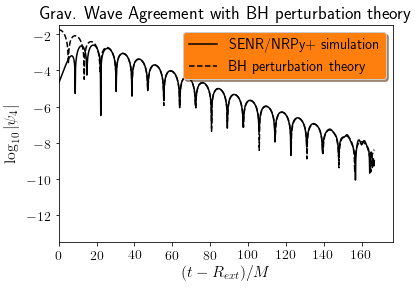

<Figure size 432x288 with 0 Axes>

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig

from matplotlib import rc
rc('text', usetex=True)


if Nr == 270:
    extraction_radius = "33.13"
    Amplitude = 1.8e-2
    Phase     = 2.8
elif Nr == 800:
    extraction_radius = "33.64"
    Amplitude = 1.8e-2
    Phase     = 2.8
else:
    print("Error: output is not tuned for Nr = "+str(Nr)+" . Plotting disabled.")
    exit(1)

#Transposed for easier unpacking:
t,psi4r1,psi4r2,psi4r3,psi4i1,psi4i2,psi4i3 = np.loadtxt("outPsi4_l2m0-"+str(Nr)+"-r"+extraction_radius+".txt").T
    
t_retarded    = []
log10abspsi4r = []
bh_pert_thry  = []
for i in range(len(psi4r1)):
    retarded_time = t[i]-np.float(extraction_radius)
    t_retarded.append(retarded_time)
    log10abspsi4r.append(np.log(np.float(extraction_radius)*np.abs(psi4r1[i] + psi4r2[i] + psi4r3[i]))/np.log(10))
    bh_pert_thry.append(np.log(Amplitude*np.exp(-0.0890*retarded_time)*np.abs(np.cos(0.3737*retarded_time+Phase)))/np.log(10))

# print(bh_pert_thry)

fig, ax = plt.subplots()
plt.title("Grav. Wave Agreement with BH perturbation theory",fontsize=18)
plt.xlabel("$(t - R_{ext})/M$",fontsize=16)
plt.ylabel('$\log_{10}|\psi_4|$',fontsize=16)

ax.plot(t_retarded, log10abspsi4r, 'k-', label='SENR/NRPy+ simulation')
ax.plot(t_retarded, bh_pert_thry, 'k--', label='BH perturbation theory')
#ax.set_xlim([0,t_retarded[len(psi4r1)-1]])
ax.set_xlim([0,final_time - float(extraction_radius)+10])
ax.set_ylim([-13.5,-1.5])

plt.xticks(size = 14)
plt.yticks(size = 14)

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C1')

plt.show()

# Note that you'll need `dvipng` installed to generate the following file:
savefig("BHperttheorycompare.png",dpi=150)

<a id='latex_pdf_output'></a>

# Step 7: Output this notebook to $\LaTeX$-formatted PDF file \[Back to [top](#toc)\]
$$\label{latex_pdf_output}$$

The following code cell converts this Jupyter notebook into a proper, clickable $\LaTeX$-formatted PDF file. After the cell is successfully run, the generated PDF may be found in the root NRPy+ tutorial directory, with filename
[Tutorial-Start_to_Finish-BSSNCurvilinear-Two_BHs_Collide-Psi4.pdf](Tutorial-Start_to_Finish-BSSNCurvilinear-Two_BHs_Collide-Psi4.pdf) (Note that clicking on this link may not work; you may need to open the PDF file through another means.)

In [16]:
!jupyter nbconvert --to latex --template latex_nrpy_style.tplx --log-level='WARN' Tutorial-Start_to_Finish-BSSNCurvilinear-Two_BHs_Collide-Psi4.ipynb
!pdflatex -interaction=batchmode Tutorial-Start_to_Finish-BSSNCurvilinear-Two_BHs_Collide-Psi4.tex
!pdflatex -interaction=batchmode Tutorial-Start_to_Finish-BSSNCurvilinear-Two_BHs_Collide-Psi4.tex
!pdflatex -interaction=batchmode Tutorial-Start_to_Finish-BSSNCurvilinear-Two_BHs_Collide-Psi4.tex
!rm -f Tut*.out Tut*.aux Tut*.log

This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
